# North East India earthquake analysis

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### About dataset:
dataset contain 2744 records
North India earthquake data magnitude more than 2.5
dataset duration 1900-2023


In [19]:
#importing the dataset
db=pd.read_csv('Northeast.csv')


In [20]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-10T00:46:37.031Z,22.9862,94.8602,141.001,4.6,mb,56.0,50.0,2.991,0.43,...,2023-04-11T05:36:07.274Z,"86 km SSE of Mawlaik, Myanmar",earthquake,9.04,5.531,0.089,38.0,reviewed,us,us
1,2023-04-08T11:52:40.719Z,25.2190,96.3038,10.000,4.2,mb,28.0,120.0,4.480,0.64,...,2023-04-08T15:42:11.988Z,"111 km W of Myitkyina, Myanmar",earthquake,8.16,1.860,0.131,17.0,reviewed,us,us
2,2023-03-25T12:03:44.799Z,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,...,2023-04-16T08:59:29.040Z,Myanmar,earthquake,8.90,4.668,0.152,12.0,reviewed,us,us
3,2023-03-24T03:22:42.572Z,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,...,2023-03-29T22:13:14.040Z,"22 km SE of Chur?ch?ndpur, India",earthquake,9.67,8.197,0.155,12.0,reviewed,us,us
4,2023-03-12T11:43:43.297Z,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,...,2023-03-24T07:27:24.040Z,"74 km ESE of W?ngjing, India",earthquake,2.94,6.734,0.060,83.0,reviewed,us,us


In [21]:
db.shape

(2851, 22)

In [22]:
db.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [23]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2851 non-null   object 
 1   latitude         2851 non-null   float64
 2   longitude        2851 non-null   float64
 3   depth            2851 non-null   float64
 4   mag              2851 non-null   float64
 5   magType          2851 non-null   object 
 6   nst              888 non-null    float64
 7   gap              1473 non-null   float64
 8   dmin             765 non-null    float64
 9   rms              2463 non-null   float64
 10  net              2851 non-null   object 
 11  id               2851 non-null   object 
 12  updated          2851 non-null   object 
 13  place            2845 non-null   object 
 14  type             2851 non-null   object 
 15  horizontalError  674 non-null    float64
 16  depthError       1775 non-null   float64
 17  magError      

In [24]:
db.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,2851.000000,2851.000000,2851.000000,2851.000000,888.000000,1473.000000,765.000000,2463.000000,674.000000,1775.000000,976.000000,2294.000000
mean,25.117037,94.052674,54.581599,4.590898,51.912162,103.041005,2.223638,0.884555,7.429303,9.797068,0.164992,19.382302
std,1.901748,2.196061,36.484266,0.577081,68.079544,45.491522,1.485837,0.266841,2.446348,7.089605,0.116834,27.462298
min,21.701400,87.683000,3.300000,3.200000,6.000000,10.000000,0.070000,0.100000,2.500000,0.000000,0.033000,1.000000
25%,23.578500,92.822500,33.000000,4.200000,16.750000,68.000000,0.991000,0.700000,5.700000,5.300000,0.091000,4.000000
50%,24.900000,94.497700,41.950000,4.500000,27.000000,102.000000,2.054000,0.880000,7.165000,7.900000,0.134000,10.000000
75%,26.493000,95.424500,83.655000,4.800000,56.000000,138.400000,3.089000,1.070000,8.900000,12.400000,0.200000,24.000000
max,29.667000,98.061300,200.000000,8.600000,555.000000,325.000000,13.200000,1.890000,19.900000,61.500000,0.980000,302.000000


### Datacleaning

In [25]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                68.853034
gap                48.333918
dmin               73.167310
rms                13.609260
net                 0.000000
id                  0.000000
updated             0.000000
place               0.210452
type                0.000000
horizontalError    76.359172
depthError         37.741143
magError           65.766398
magNst             19.537005
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [26]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-10T00:46:37.031Z,22.9862,94.8602,141.001,4.6,mb,56.0,50.0,2.991,0.43,...,2023-04-11T05:36:07.274Z,"86 km SSE of Mawlaik, Myanmar",earthquake,9.04,5.531,0.089,38.0,reviewed,us,us
1,2023-04-08T11:52:40.719Z,25.2190,96.3038,10.000,4.2,mb,28.0,120.0,4.480,0.64,...,2023-04-08T15:42:11.988Z,"111 km W of Myitkyina, Myanmar",earthquake,8.16,1.860,0.131,17.0,reviewed,us,us
2,2023-03-25T12:03:44.799Z,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,...,2023-04-16T08:59:29.040Z,Myanmar,earthquake,8.90,4.668,0.152,12.0,reviewed,us,us
3,2023-03-24T03:22:42.572Z,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,...,2023-03-29T22:13:14.040Z,"22 km SE of Chur?ch?ndpur, India",earthquake,9.67,8.197,0.155,12.0,reviewed,us,us
4,2023-03-12T11:43:43.297Z,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,...,2023-03-24T07:27:24.040Z,"74 km ESE of W?ngjing, India",earthquake,2.94,6.734,0.060,83.0,reviewed,us,us


we can see in places we have some data of other countries also but as we want data of only india,nepal we will remove rest

In [27]:
db['place']=db['place'].str.split(',').str[1]

In [28]:
db['place']=db['place'].str.strip()

In [29]:
db['place'].unique()

array(['Myanmar', nan, 'India', 'India region', 'Bhutan', 'China',
       'Nepal', 'Bangladesh'], dtype=object)

In [30]:
db.replace('India region','India',inplace=True)

In [31]:
db['place'].fillna('India',inplace=True)

In [32]:
db=db[db['place']=='India']

In [33]:
db['place'].unique()

array(['India'], dtype=object)

In [34]:
db.shape

(1685, 22)

In [35]:
db['magSource'].unique()

array(['us', 'ndi', 'gcmt', 'hrv', 'dmn', 'bji', 'iscgem', 'iscgemsup',
       'official'], dtype=object)

 We will be trying to remove columns which wont be useful to us

In [36]:
db['magSource'].value_counts()

us           1469
iscgem        149
hrv            54
gcmt            7
iscgemsup       2
ndi             1
dmn             1
bji             1
official        1
Name: magSource, dtype: int64

In [37]:
db['locationSource'].unique()

array(['us', 'iscgem', 'iscgemsup'], dtype=object)

In [38]:
db['magSource'].value_counts()

us           1469
iscgem        149
hrv            54
gcmt            7
iscgemsup       2
ndi             1
dmn             1
bji             1
official        1
Name: magSource, dtype: int64

In [39]:
db['status'].unique()

array(['reviewed', 'automatic'], dtype=object)

In [40]:
db['type'].unique()

array(['earthquake'], dtype=object)

In [41]:
db['updated']

2       2023-04-16T08:59:29.040Z
3       2023-03-29T22:13:14.040Z
4       2023-03-24T07:27:24.040Z
5       2023-04-06T00:15:57.040Z
6       2023-03-09T05:16:15.233Z
                  ...           
2845    2022-04-26T00:05:52.707Z
2846    2022-04-26T00:06:41.427Z
2847    2022-04-25T20:29:46.706Z
2848    2022-04-25T20:27:34.145Z
2849    2022-04-25T20:40:07.858Z
Name: updated, Length: 1685, dtype: object

we are dropping few columns which contain reductant info and which wont have much effect on our data

1. dropping type,status,place as they contain same value in all the columns
2. dropping columns updated ,magsource,locationSource as they contain information regarding the meta data like place where these data were collected location when was the data last updated and much more 

In [42]:
db.drop(columns=['updated','type','status','magSource','locationSource','place'],inplace=True)

In [43]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,horizontalError,depthError,magError,magNst
2,2023-03-25T12:03:44.799Z,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,us,us7000jmp2,8.90,4.668,0.152,12.0
3,2023-03-24T03:22:42.572Z,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,us,us6000k0lk,9.67,8.197,0.155,12.0
4,2023-03-12T11:43:43.297Z,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,us,us7000jjbm,2.94,6.734,0.060,83.0
5,2023-02-26T04:19:53.486Z,25.6554,90.4081,10.000,4.3,mb,21.0,163.0,5.059,0.80,us,us7000jhnb,9.05,1.929,0.161,11.0
6,2023-02-16T03:56:28.218Z,25.1917,91.8394,57.099,4.3,mb,39.0,111.0,2.510,1.02,us,us6000jpaj,3.60,8.331,0.129,18.0


In [44]:
db['net'].unique()

array(['us', 'iscgem', 'iscgemsup', 'official'], dtype=object)

In [45]:
db['id'].unique()

array(['us7000jmp2', 'us6000k0lk', 'us7000jjbm', ..., 'iscgem16958007',
       'iscgem16957918', 'iscgem610548640'], dtype=object)

In [46]:
db.drop(columns=['id','net'],inplace=True)

dropping id and net beacuse they are the information about how,when and what recorded this data

In [47]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
2,2023-03-25T12:03:44.799Z,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,8.90,4.668,0.152,12.0
3,2023-03-24T03:22:42.572Z,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,9.67,8.197,0.155,12.0
4,2023-03-12T11:43:43.297Z,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,2.94,6.734,0.060,83.0
5,2023-02-26T04:19:53.486Z,25.6554,90.4081,10.000,4.3,mb,21.0,163.0,5.059,0.80,9.05,1.929,0.161,11.0
6,2023-02-16T03:56:28.218Z,25.1917,91.8394,57.099,4.3,mb,39.0,111.0,2.510,1.02,3.60,8.331,0.129,18.0


In [48]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                70.979228
gap                51.691395
dmin               74.124629
rms                15.548961
horizontalError    76.854599
depthError         39.584570
magError           65.222552
magNst             21.483680
dtype: float64

In [49]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 2 to 2849
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1685 non-null   object 
 1   latitude         1685 non-null   float64
 2   longitude        1685 non-null   float64
 3   depth            1685 non-null   float64
 4   mag              1685 non-null   float64
 5   magType          1685 non-null   object 
 6   nst              489 non-null    float64
 7   gap              814 non-null    float64
 8   dmin             436 non-null    float64
 9   rms              1423 non-null   float64
 10  horizontalError  390 non-null    float64
 11  depthError       1018 non-null   float64
 12  magError         586 non-null    float64
 13  magNst           1323 non-null   float64
dtypes: float64(12), object(2)
memory usage: 197.5+ KB


Lets fill the null values now

In [50]:
db['nst'].fillna(db['nst'].mean(),inplace=True)

In [51]:
db['gap'].fillna(db['gap'].mean(),inplace=True)

In [52]:

db['dmin'].fillna(db['dmin'].mean(),inplace=True)
db['rms'].fillna(db['rms'].mean(),inplace=True)
db['depthError'].fillna(db['depthError'].mean(),inplace=True)
db['horizontalError'].fillna(db['horizontalError'].mean(),inplace=True)
db['magError'].fillna(db['magError'].mean(),inplace=True)
db['magNst'].fillna(db['magNst'].mean(),inplace=True)


In [53]:
db.isnull().mean()*100

time               0.0
latitude           0.0
longitude          0.0
depth              0.0
mag                0.0
magType            0.0
nst                0.0
gap                0.0
dmin               0.0
rms                0.0
horizontalError    0.0
depthError         0.0
magError           0.0
magNst             0.0
dtype: float64

so for now we have replaced all the null values with mean



In [54]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 2 to 2849
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1685 non-null   object 
 1   latitude         1685 non-null   float64
 2   longitude        1685 non-null   float64
 3   depth            1685 non-null   float64
 4   mag              1685 non-null   float64
 5   magType          1685 non-null   object 
 6   nst              1685 non-null   float64
 7   gap              1685 non-null   float64
 8   dmin             1685 non-null   float64
 9   rms              1685 non-null   float64
 10  horizontalError  1685 non-null   float64
 11  depthError       1685 non-null   float64
 12  magError         1685 non-null   float64
 13  magNst           1685 non-null   float64
dtypes: float64(12), object(2)
memory usage: 197.5+ KB


In [55]:
db['magType'].unique()

array(['mb', 'mww', 'mwb', 'ml', 'mwc', 'mw', 'ms'], dtype=object)

In [56]:
db.groupby(['magType','mag']).size()

magType  mag
mb       3.4     1
         3.5     5
         3.6    10
         3.7    22
         3.8    33
                ..
mww      5.9     1
         6.0     1
         6.2     1
         6.7     1
         6.9     1
Length: 169, dtype: int64

'mb' stands for body wave magnitude and is calculated using the amplitude of the earthquake's P-waves and S-waves.

'mwc' stands for moment magnitude (Mw) from complete waveform modeling, which is a type of magnitude scale that takes into account the total energy released by an earthquake.

'mwb' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves.

'ms' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves at a period of approximately 20 seconds.

'mw' stands for moment magnitude, which is a type of magnitude scale that takes into account the seismic moment (i.e., the total energy released by an earthquake) and is considered to be a more accurate measure of an earthquake's size than other magnitude types.

In [57]:
db['time']

2       2023-03-25T12:03:44.799Z
3       2023-03-24T03:22:42.572Z
4       2023-03-12T11:43:43.297Z
5       2023-02-26T04:19:53.486Z
6       2023-02-16T03:56:28.218Z
                  ...           
2845    1915-12-03T02:39:23.440Z
2846    1914-03-28T10:44:47.030Z
2847    1908-12-12T12:54:55.960Z
2848    1906-08-31T14:57:23.960Z
2849    1906-05-12T05:48:44.320Z
Name: time, Length: 1685, dtype: object

In [58]:
db['time']=pd.to_datetime(db['time'])

we have converted our time data in datetime format

In [59]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
2,2023-03-25 12:03:44.799000+00:00,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,8.90,4.668,0.152,12.0
3,2023-03-24 03:22:42.572000+00:00,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,9.67,8.197,0.155,12.0
4,2023-03-12 11:43:43.297000+00:00,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,2.94,6.734,0.060,83.0
5,2023-02-26 04:19:53.486000+00:00,25.6554,90.4081,10.000,4.3,mb,21.0,163.0,5.059,0.80,9.05,1.929,0.161,11.0
6,2023-02-16 03:56:28.218000+00:00,25.1917,91.8394,57.099,4.3,mb,39.0,111.0,2.510,1.02,3.60,8.331,0.129,18.0


Now lets extract date,year,month,day and hour from our data

In [60]:
db['year']=db['time'].dt.year
db['month']=db['time'].dt.month
db['day']=db['time'].dt.day
db['hour']=db['time'].dt.hour
db['min']=db['time'].dt.minute

In [61]:
db.drop(columns='time',inplace=True)

In [62]:
db.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,hour,min
2,22.6542,95.3355,11.095,4.2,mb,16.0,136.0,2.453,0.29,8.90,4.668,0.152,12.0,2023,3,25,12,3
3,24.1675,93.7940,78.995,4.4,mb,32.0,73.0,2.471,0.52,9.67,8.197,0.155,12.0,2023,3,24,3,22
4,24.2760,94.7151,113.110,4.6,mb,77.0,48.0,4.097,0.43,2.94,6.734,0.060,83.0,2023,3,12,11,43
5,25.6554,90.4081,10.000,4.3,mb,21.0,163.0,5.059,0.80,9.05,1.929,0.161,11.0,2023,2,26,4,19
6,25.1917,91.8394,57.099,4.3,mb,39.0,111.0,2.510,1.02,3.60,8.331,0.129,18.0,2023,2,16,3,56


Now we have replaced null values extracted value from time columns 
now lets move to data visualization

### Data Visualization

In [63]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [64]:
#import folium

In [65]:
#map=folium.Map(location=[db[latitude[0],db[longitude[]]])


In [66]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 2 to 2849
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1685 non-null   float64
 1   longitude        1685 non-null   float64
 2   depth            1685 non-null   float64
 3   mag              1685 non-null   float64
 4   magType          1685 non-null   object 
 5   nst              1685 non-null   float64
 6   gap              1685 non-null   float64
 7   dmin             1685 non-null   float64
 8   rms              1685 non-null   float64
 9   horizontalError  1685 non-null   float64
 10  depthError       1685 non-null   float64
 11  magError         1685 non-null   float64
 12  magNst           1685 non-null   float64
 13  year             1685 non-null   int64  
 14  month            1685 non-null   int64  
 15  day              1685 non-null   int64  
 16  hour             1685 non-null   int64  
 17  min           

mb     1422
mw      179
mwc      34
mww      27
mwb      14
ms        6
ml        3
Name: magType, dtype: int64


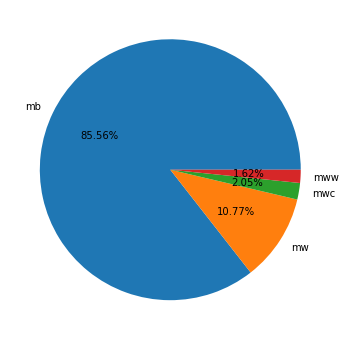

In [67]:
magType=db['magType'].value_counts().index
freq=db['magType'].value_counts().values

plt.pie(x=freq[0:4],labels=magType[0:4],autopct='%1.2f%%')
print(db['magType'].value_counts())

In [68]:
year=db['year'].value_counts().index
freq=db['year'].value_counts().values

([<matplotlib.patches.Wedge at 0x19f1ca964f0>,
 [Text(0.6875838192529147, 0.8586201089548133, '2021'),
  Text(-0.9269129211842869, 0.5923110977700926, '2020'),
  Text(-0.6119395398303054, -0.9140733009952069, '2008'),
  Text(0.8437646978542166, -0.7057344646926227, '2014')],
 [Text(0.3750457195924989, 0.46833824124807993, '28.51%'),
  Text(-0.5055888661005201, 0.3230787806018686, '24.89%'),
  Text(-0.3337852035438029, -0.49858543690647644, '24.43%'),
  Text(0.46023528973866357, -0.38494607165052147, '22.17%')])

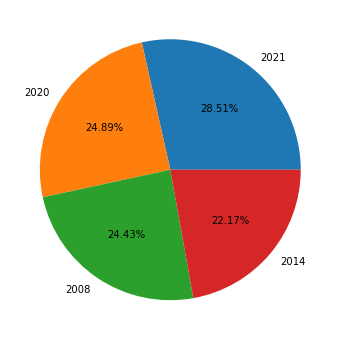

In [69]:
plt.pie(x=freq[0:4],labels=year[0:4],autopct='%1.2f%%')

Most of the earthquakes happened in year 2001

([<matplotlib.patches.Wedge at 0x19f1d375280>,
 [Text(0.7641241712858572, 0.7912738153488349, '12'),
  Text(-0.8174594090980857, 0.7360435547418432, '9'),
  Text(-0.7360435164738056, -0.8174594435547703, '10'),
  Text(0.7912739226625294, -0.7641240601592477, '6')],
 [Text(0.4167950025195584, 0.43160389928118265, '25.56%'),
  Text(-0.4458869504171376, 0.4014783025864599, '25.56%'),
  Text(-0.4014782817129849, -0.44588696921169285, '24.44%'),
  Text(0.4316039578159251, -0.4167949419050442, '24.44%')])

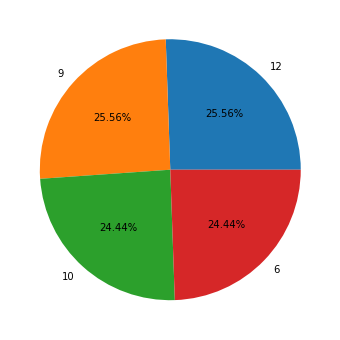

In [70]:
day=db['day'].value_counts().index
freq=db['day'].value_counts().values

plt.pie(x=freq[0:4],labels=day[0:4],autopct='%1.2f%%')

In [71]:
db['day'].value_counts()

12    69
9     69
10    66
6     66
21    65
3     64
2     61
11    61
17    61
30    61
29    60
18    59
28    59
24    58
25    56
23    55
27    55
16    54
8     52
26    51
22    48
5     48
15    47
1     47
20    44
4     43
19    43
14    43
13    41
7     40
31    39
Name: day, dtype: int64

8     173
4     149
5     148
11    145
3     141
7     141
9     140
12    138
1     135
2     132
6     132
10    111
Name: month, dtype: int64


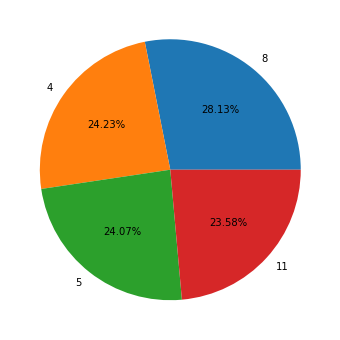

In [72]:
month=db['month'].value_counts().index
freq=db['month'].value_counts().values

plt.pie(x=freq[0:4],labels=month[0:4],autopct='%1.2f%%')
print(db['month'].value_counts())

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mag', ylabel='count'>

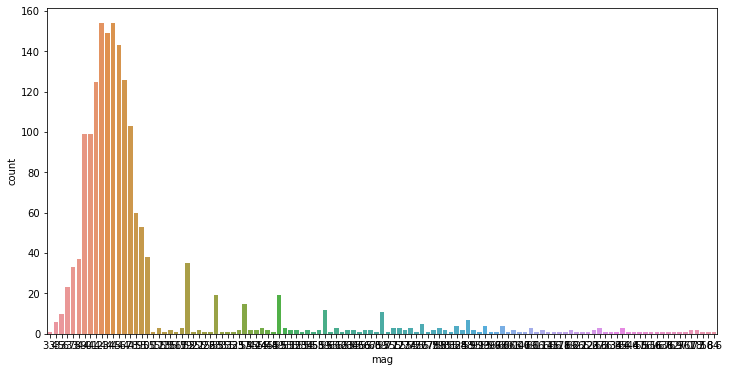

In [73]:
sns.countplot(db['mag'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

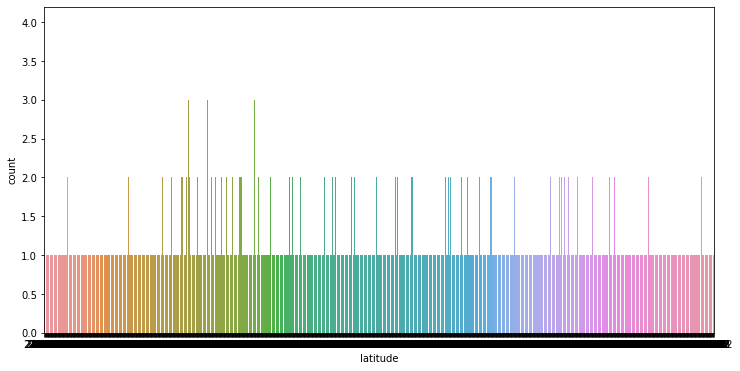

In [74]:
sns.countplot(db['latitude'])

it can be seen almost all values of latitude occur single time except few which occur 2 or 3 times.

repeating latittude represents earthquake reoccuring same place

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='count'>

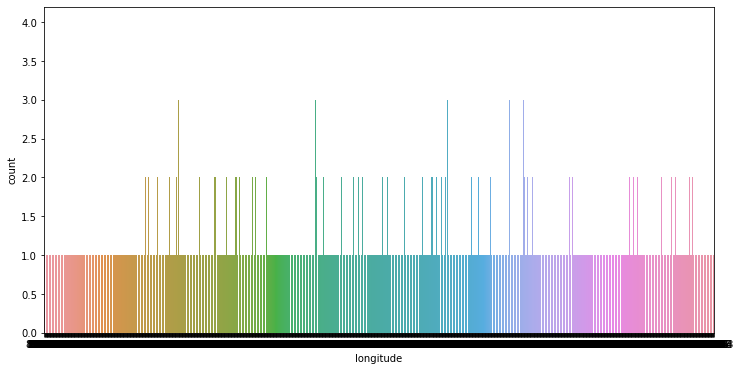

In [75]:
sns.countplot(db['longitude'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth', ylabel='count'>

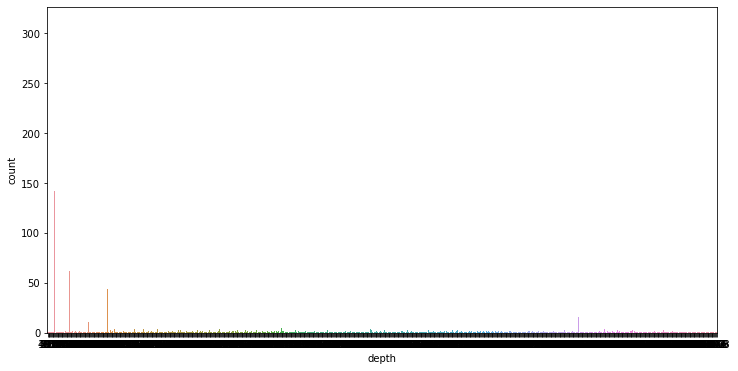

In [76]:
sns.countplot(db['depth'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magType', ylabel='count'>

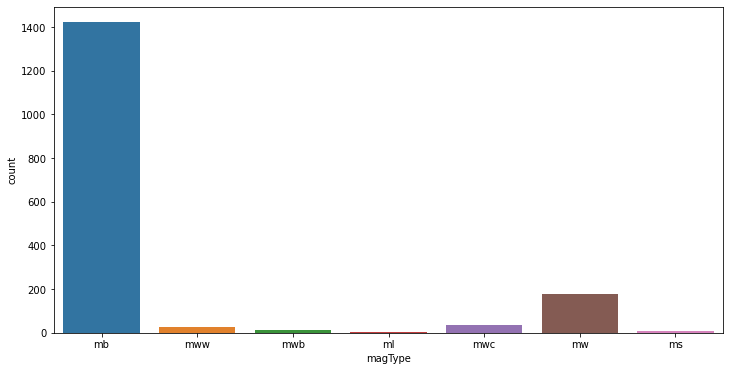

In [77]:
sns.countplot(db['magType'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nst', ylabel='count'>

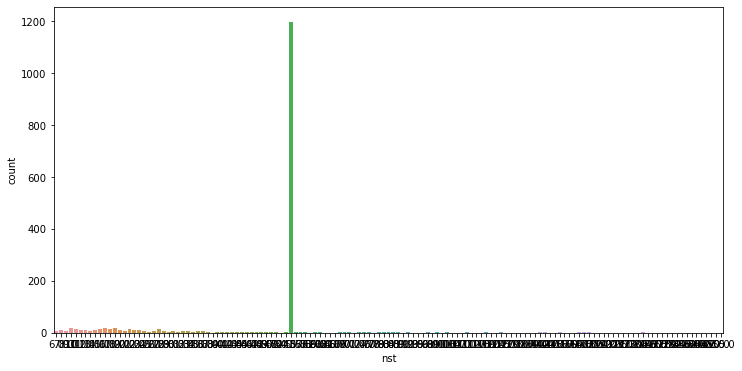

In [78]:
sns.countplot(db['nst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gap', ylabel='count'>

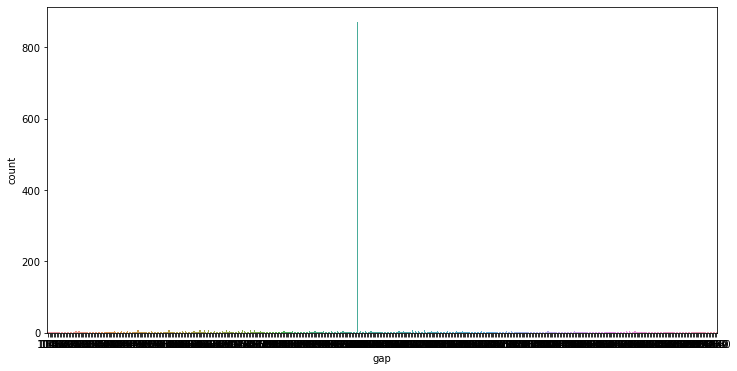

In [79]:
sns.countplot(db['gap'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

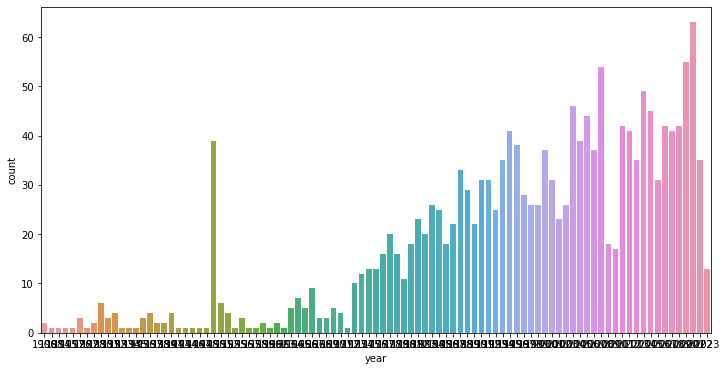

In [80]:
sns.countplot(db['year'])

In [81]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rms', ylabel='count'>

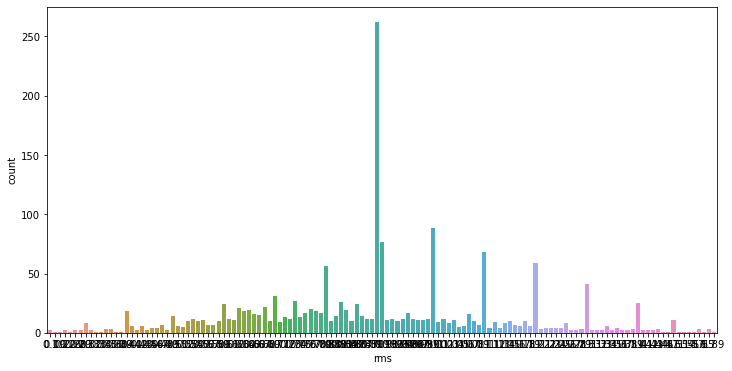

In [82]:
sns.countplot(db['rms'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magNst', ylabel='count'>

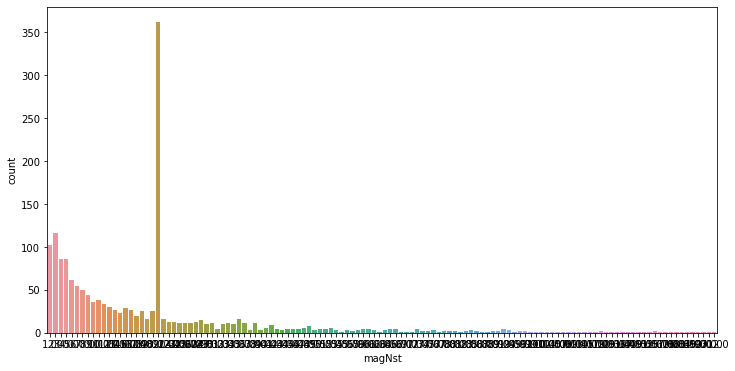

In [83]:
sns.countplot(db['magNst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


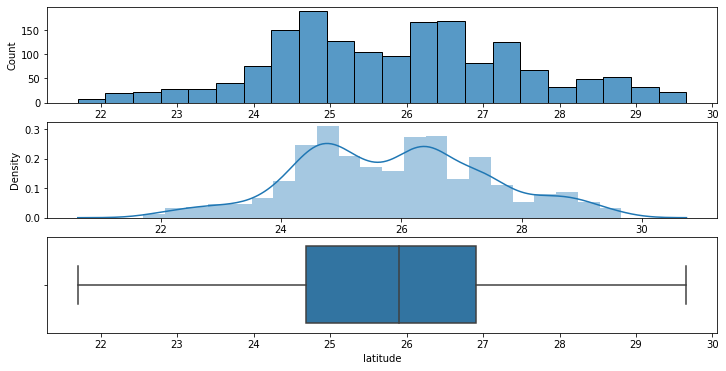

In [84]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['latitude'], ax=axs[0]);
sns.distplot(db['latitude'], ax=axs[1])
sns.boxplot(db['latitude'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


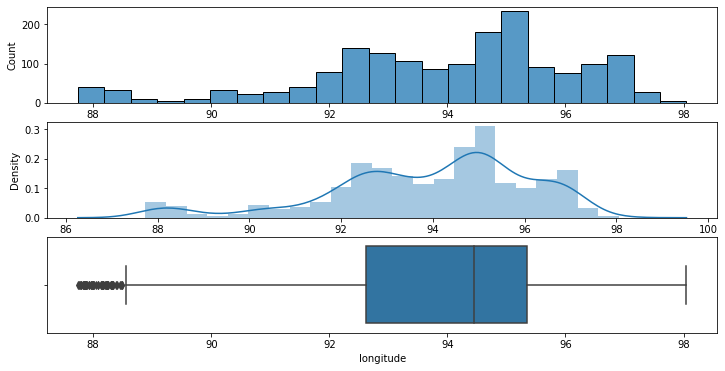

In [85]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['longitude'], ax=axs[0]);
sns.distplot(db['longitude'], ax=axs[1])
sns.boxplot(db['longitude'], ax=axs[2]);

In [86]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


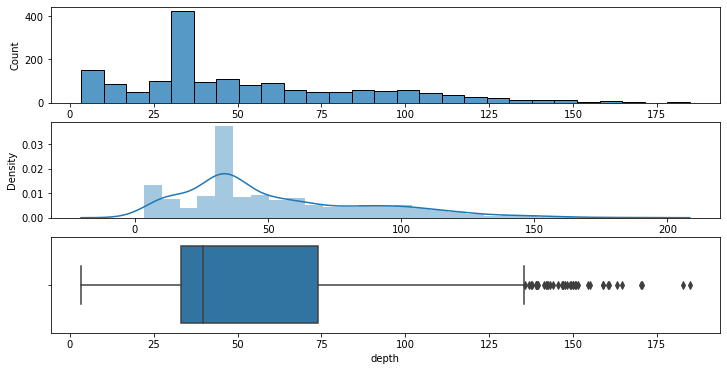

In [87]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['depth'], ax=axs[0]);
sns.distplot(db['depth'], ax=axs[1])
sns.boxplot(db['depth'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


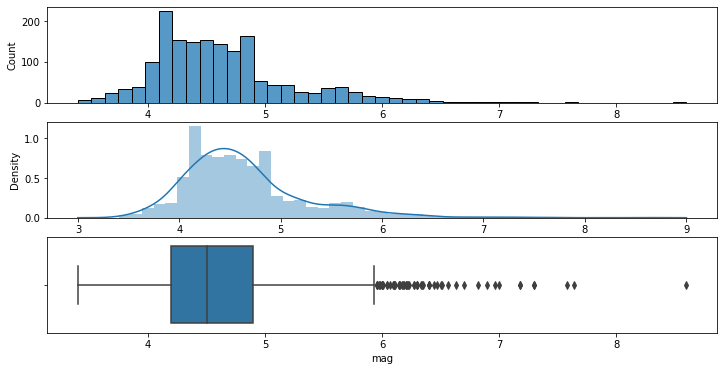

In [88]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['mag'], ax=axs[0]);
sns.distplot(db['mag'], ax=axs[1])
sns.boxplot(db['mag'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


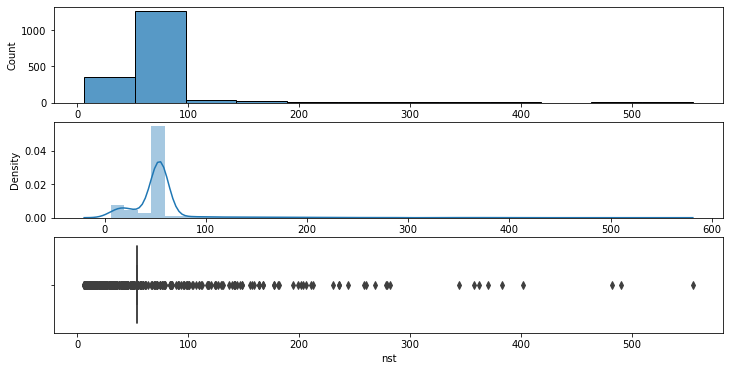

In [89]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['nst'], ax=axs[0]);
sns.distplot(db['nst'], ax=axs[1])
sns.boxplot(db['nst'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


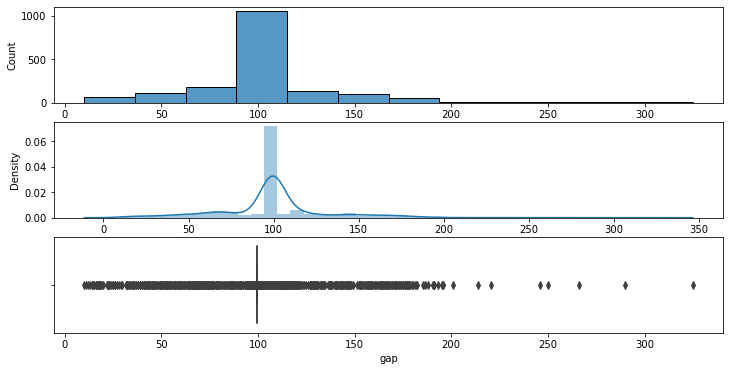

In [90]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['gap'], ax=axs[0]);
sns.distplot(db['gap'], ax=axs[1])
sns.boxplot(db['gap'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


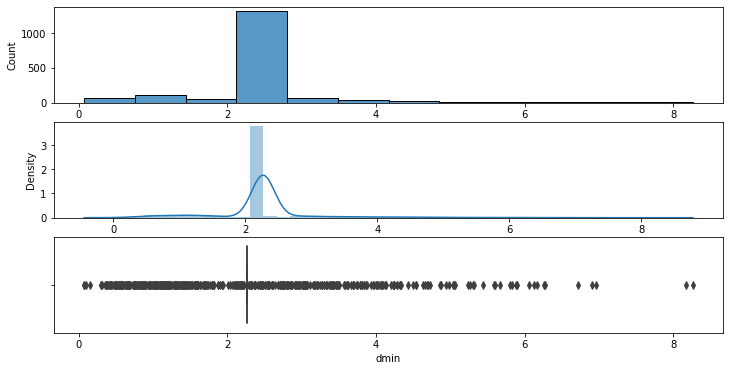

In [91]:

fig, axs = plt.subplots(nrows=3)
sns.histplot(db['dmin'], ax=axs[0]);
sns.distplot(db['dmin'], ax=axs[1])
sns.boxplot(db['dmin'], ax=axs[2]);

### Now lets do bivariate analysis

using scatterplot

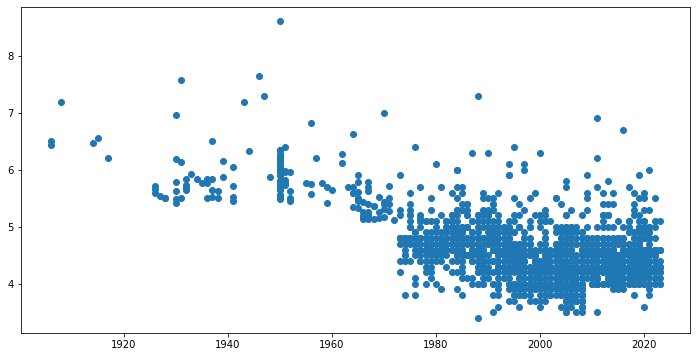

In [92]:
plt.scatter(x='year',y='mag',data=db)

observation:
it can be seen their are more data points after 1980 possible reason for which may be:

1. Data collection technique,instrument for earthquake got serious and efficient

2. In year 2001 their are more no of earthquake that occured


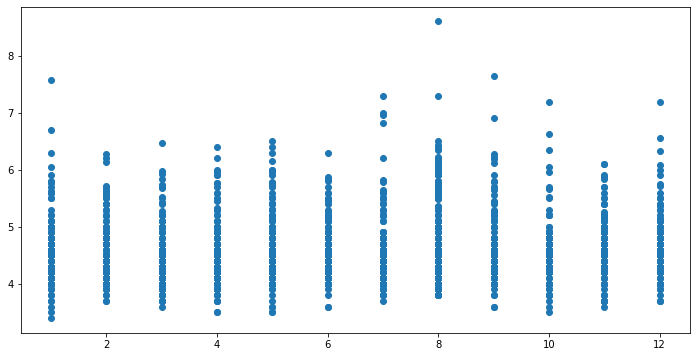

In [93]:
plt.scatter(x='month',y='mag',data=db)

month and magnitude distribution is almost same representing not much impact of month 

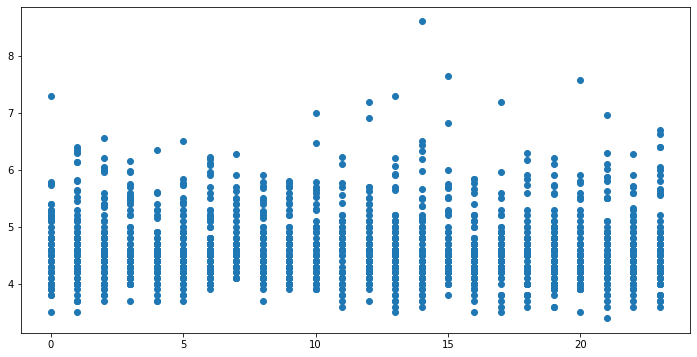

In [94]:
plt.scatter(x='hour',y='mag',data=db)

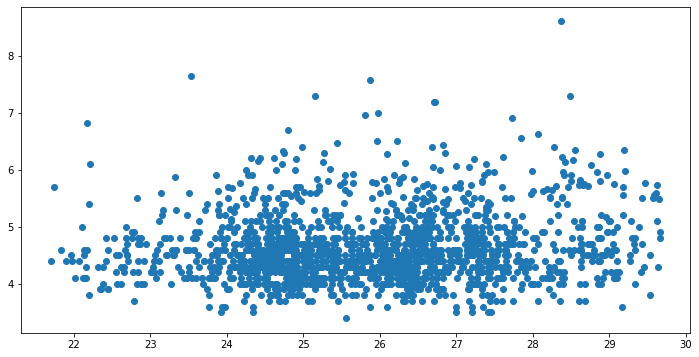

In [95]:
plt.scatter(x='latitude',y='mag',data=db)

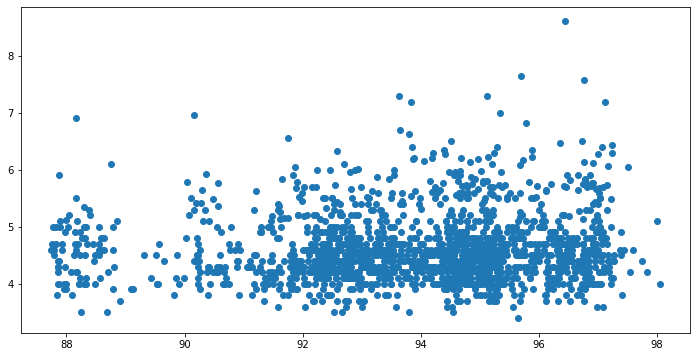

In [96]:
plt.scatter(x='longitude',y='mag',data=db)

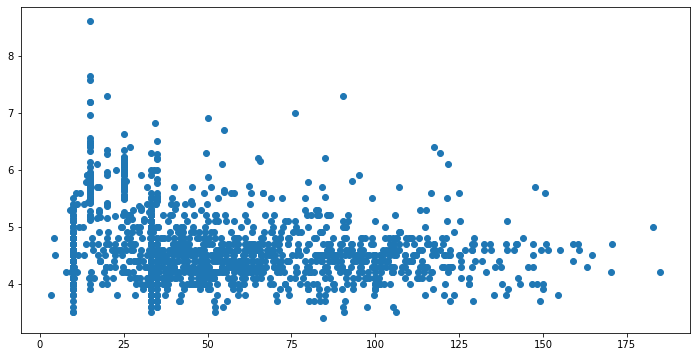

In [97]:
plt.scatter(x='depth',y='mag',data=db)

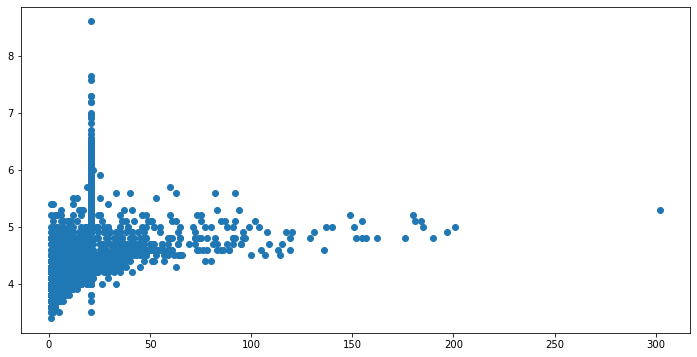

In [98]:
plt.scatter(x='magNst',y='mag',data=db)

In [99]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

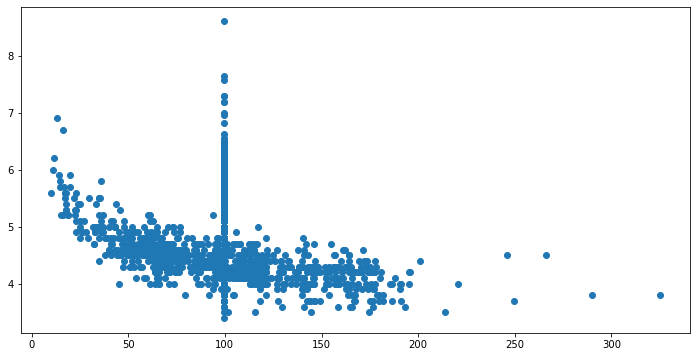

In [100]:
plt.scatter(x='gap',y='mag',data=db)

it can be seen that as gap is increasing the magnitude of earthquake also decreases. the points where we see more number of points in same line is beacuse we replaced the null values with mean

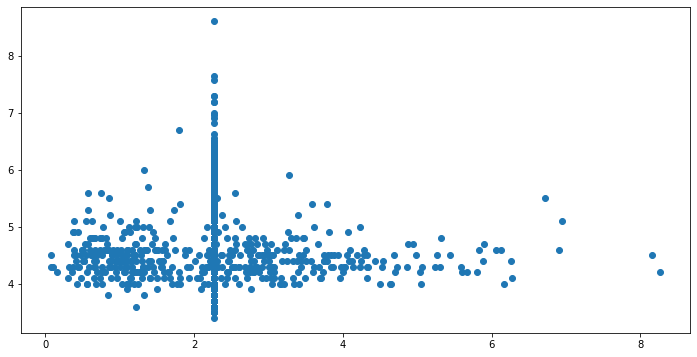

In [101]:
plt.scatter(x='dmin',y='mag',data=db)

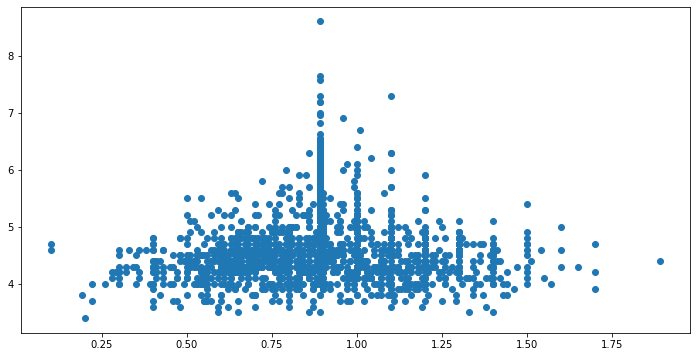

In [102]:
plt.scatter(x='rms',y='mag',data=db)

In [103]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

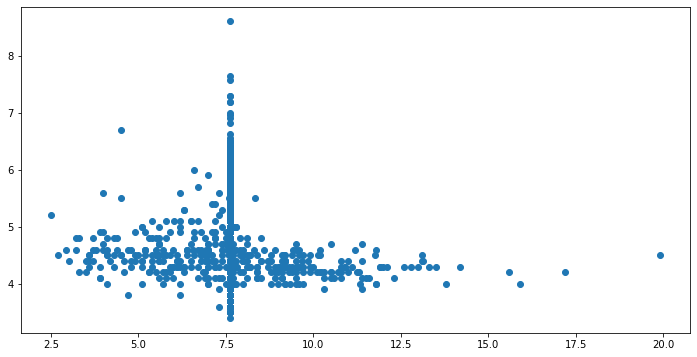

In [104]:
plt.scatter(x='horizontalError',y='mag',data=db)

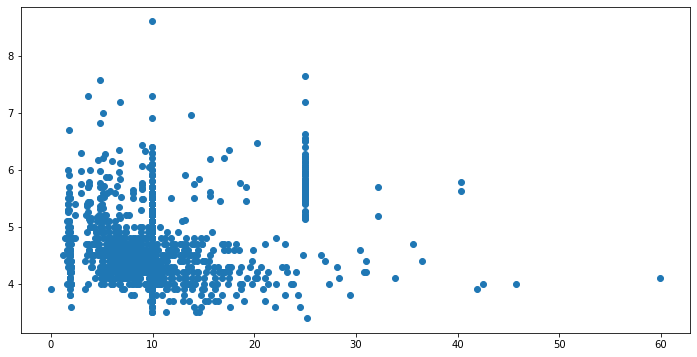

In [105]:
plt.scatter(x='depthError',y='mag',data=db)

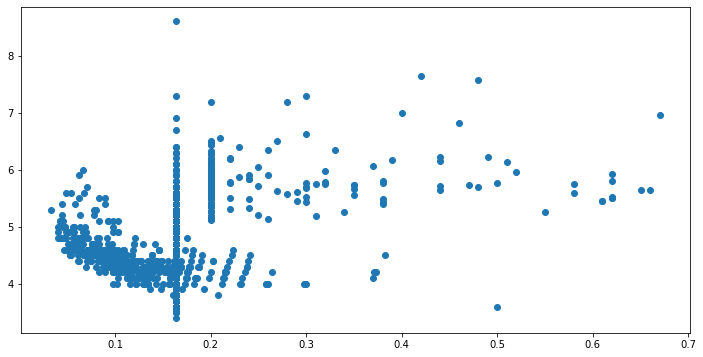

In [106]:
plt.scatter(x='magError',y='mag',data=db)

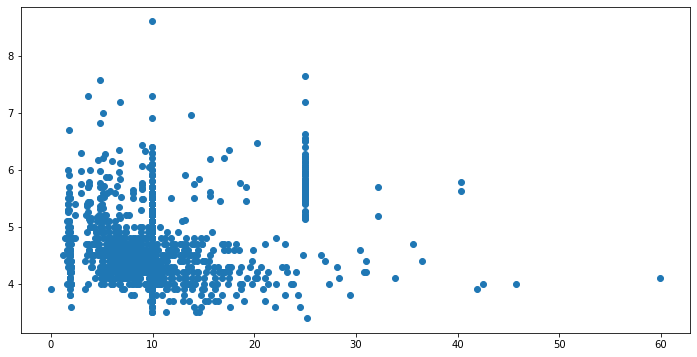

In [107]:
plt.scatter(x='depthError',y='mag',data=db)

<AxesSubplot:>

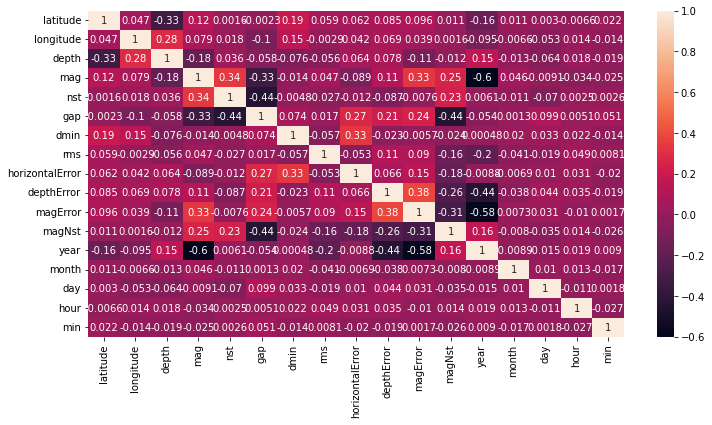

In [108]:
#drawing heatmap
sns.heatmap(db.corr(),annot=True,cbar='coolwarm')

observation:
1. variables which have positive correlation with magnitude:

    . nst ->0.4
    . magnst -> 0.42
    . depth error and magerror
2. negative corr:
     . gap -0.44
     . year -0.41
    

def correlation(data):
    pos=dict()
    neg=dict()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>0:
                pos[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
            else:
                neg[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
    print(pos)  
    print("") 
    print(neg)

In [109]:
db.drop(columns=['magType'],inplace=True)

In [110]:
db.drop(columns=['dmin'],inplace=True)

In [111]:
db.drop(columns=['depthError','min'],inplace=True)

In [112]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms',
       'horizontalError', 'magError', 'magNst', 'year', 'month', 'day',
       'hour'],
      dtype='object')

### feature scaling

There are two major types of feature scaling :

1. Standardization.
2. Normalization.

We can use StandardScalar to scale our data:


StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
The values will lie be between -1 and 1.

In [113]:
#spliting the data in target and input variable
x=db.drop(columns='mag')
y=db['mag']

In [114]:
x

,latitude,longitude,depth,nst,gap,rms,horizontalError,magError,magNst,year,month,day,hour
2,22.6542,95.3355,11.095,16.000000,136.000000,0.290000,8.900000,0.152,12.000000,2023,3,25,12
3,24.1675,93.7940,78.995,32.000000,73.000000,0.520000,9.670000,0.155,12.000000,2023,3,24,3
4,24.2760,94.7151,113.110,77.000000,48.000000,0.430000,2.940000,0.060,83.000000,2023,3,12,11
5,25.6554,90.4081,10.000,21.000000,163.000000,0.800000,9.050000,0.161,11.000000,2023,2,26,4
6,25.1917,91.8394,57.099,39.000000,111.000000,1.020000,3.600000,0.129,18.000000,2023,2,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,27.8440,91.7520,15.000,54.124744,99.509582,0.891975,7.611077,0.210,20.611489,1915,12,3,2
2846,25.4380,96.3560,15.000,54.124744,99.509582,0.891975,7.611077,0.200,20.611489,1914,3,28,10
2847,26.7200,97.1170,15.000,54.124744,99.509582,0.891975,7.611077,0.200,20.611489,1908,12,12,12
2848,26.8320,97.2460,15.000,54.124744,99.509582,0.891975,7.611077,0.200,20.611489,1906,8,31,14


In [115]:
y

2       4.20
3       4.40
4       4.60
5       4.30
6       4.30
        ... 
2845    6.56
2846    6.47
2847    7.18
2848    6.44
2849    6.51
Name: mag, Length: 1685, dtype: float64

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
standarscaler=StandardScaler()

In [118]:
standarscaler=standarscaler.fit(x)
scaled_x=standarscaler.transform(x)

## Data Modelling

In [119]:
scaled_x

array([[-2.01375533,  0.63870987, -1.19626807, ..., -1.02566975,
         1.01445624,  0.03746966],
       [-1.06321188, -0.07084931,  0.75977241, ..., -1.02566975,
         0.9024406 , -1.24232164],
       [-0.99506019,  0.35313704,  1.74254591, ..., -1.02566975,
        -0.44174717, -0.10472938],
       ...,
       [ 0.54008035,  1.4587421 , -1.08377414, ...,  1.61647085,
        -0.44174717,  0.03746966],
       [ 0.61043049,  1.51812136, -1.08377414, ...,  0.44218614,
         1.68655013,  0.32186772],
       [ 0.23104224,  0.26425227, -0.50762083, ..., -0.43852739,
        -0.44174717, -0.95792357]])

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,train_size=0.8, random_state=2)

### LinearRegression

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr=LinearRegression()

In [123]:
lr.fit(x_train,y_train)

LinearRegression()

In [124]:
lrprediction=lr.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error, r2_score 

In [126]:
mse = mean_squared_error(y_test, lrprediction)
rmse = mean_squared_error(y_test, lrprediction, squared=False)
mae = mean_absolute_error(y_test, lrprediction)
r2 = r2_score(y_test, lrprediction)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.12563495599783958
Root mean squared error: 0.3544502165295425
Mean absolute error: 0.25643486375867386
R-squared: 0.5879906877239024


our predictions are not perfect, but they are reasonable. We are off by an average of 0.125 units from the actual values, which is relatively small compared to the range of the target variable. Additionally, our R2 value of 0.587 indicates that our model is able to explain about 58.7% of the variance in the target variable.

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf=RandomForestRegressor()

In [129]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [130]:
rf_prediciton=rf.predict(x_test)

In [131]:
mse = mean_squared_error(y_test, rf_prediciton)
rmse = mean_squared_error(y_test, rf_prediciton, squared=False)
mae = mean_absolute_error(y_test, rf_prediciton)
r2 = r2_score(y_test, rf_prediciton)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.08122252454005932
Root mean squared error: 0.28499565705473356
Mean absolute error: 0.20942818991097925
R-squared: 0.7336375357376355


In summary, our predictions are not very accurate, and we are off by an average of 0.0812 units from the actual values. Our R2 value of 0.7336375 indicates that our model is only able to explain about 73.3% of the variance in the target variable.
Overall, the model's accuracy seems to be fairly good based on these performance metrics, but it could potentially be improved further.



### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dt=DecisionTreeRegressor(max_depth=1)

In [134]:
dt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=1)

In [135]:
dtpredicition=dt.predict(x_test)

In [136]:
mse = mean_squared_error(y_test, dtpredicition)
rmse = mean_squared_error(y_test, dtpredicition, squared=False)
mae = mean_absolute_error(y_test, dtpredicition)
r2 = r2_score(y_test, dtpredicition)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.2034584700799886
Root mean squared error: 0.4510637095577393
Mean absolute error: 0.3349771051013178
R-squared: 0.3327749934831469


he R-squared value of 0.332 indicates that the model only explains 33% of the total variation in the target variable. This means that a large portion of the variation in the target variable is not explained by the model, 

### Support Vector Machine

In [137]:
from sklearn.svm import SVR

In [138]:
svr=SVR(kernel='linear', C=1e3, gamma=0.1, epsilon=0.1)

In [139]:
svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.1, kernel='linear')

In [140]:
svrpredict=svr.predict(x_test)

In [141]:
mse = mean_squared_error(y_test, svrpredict)
rmse = mean_squared_error(y_test, svrpredict, squared=False)
mae = mean_absolute_error(y_test, svrpredict)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.12382634478980013
Root mean squared error: 0.3518896770151124
Mean absolute error: 0.2512698192423311
R-squared: 0.593921876652022


The R-squared value indicates the proportion of variance in the target variable that can be explained by the model. A higher R-squared value indicates better performance. In this case, the R-squared value is 0.593, which indicates that the model can explain about 59.3% of the variance in the target variable. 

### Gradient Boosting

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
gbr=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=1, random_state=42)

In [144]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=1, n_estimators=1000,
                          random_state=42)

In [145]:
gbrprediction=gbr.predict(x_test)

In [146]:
mse = mean_squared_error(y_test, gbrprediction)
rmse = mean_squared_error(y_test, gbrprediction, squared=False)
mae = mean_absolute_error(y_test, gbrprediction)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.0892647790436151
Root mean squared error: 0.2987721189194452
Mean absolute error: 0.21396540013594517
R-squared: 0.593921876652022


R-squared (R2) is a measure of how well the model fits the data. It takes values between 0 and 1, with higher values indicating a better fit. In this case, the R2 score is 0.5939, which is not too high.
There is significant room for improvement in our prediction, and we need to consider modifying our model or exploring different features to improve the performance.


## Random forest has the heighest accuracy : R-squared: 0.7336